<a href="https://colab.research.google.com/github/tomcat472/geopandas_mm/blob/main/geopandas_june_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 377 kB/s 
     |████████████████████████████████| 6.3 MB 41.2 MB/s 


In [3]:
# importing libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading data of gpd datasets
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [5]:
# coordinate reference system အား စစ်ခြင်း
print(world.crs)
print(cities.crs)

epsg:4326
epsg:4326


In [6]:
# coordinate reference system အားပြောင်းလဲ သတ်မှတ်ခြင်း
# world.to_crs(epsg='4979')
# world.crs

# world shp file အရ နိုင်ငံသားတခုဦးချင်းစီ၏ ဝင်ငွေအားတွက်ထုတ်ခြင်း

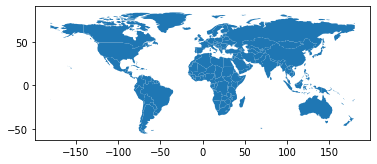

In [7]:
# ပထမဆုံးလုပ်ရမှာက ကမ္ဘာပေါ်က လူမနေတဲ့နေရာတွေကို ဖယ်ရမှာဖြစ်ပါတယ်။

world=world[(world.pop_est > 0) & (world.name!='Antarctica') & (world.name!='Fr.S.Antarctic Lands')]
world.plot()

# plot လုပ်လိုက်တာနဲ့ ကိုယ်ဖယ်လိုက်တဲ့ နေရာတွေမပါတာကို တွေ့ရမှာဖြစ်ပါတယ်။

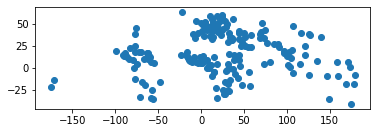

In [8]:
# point များအား plot လုပ်ခြင်း
# ကျွန်တော်တို့မှာ ရှိတဲ့ cities file က point အမျိုးအစား data တွေဖြစ်ပါတယ်။
cities.plot()

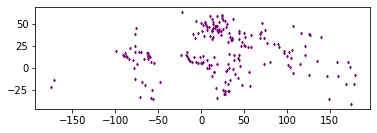

In [9]:
# point တွေကို matplotlib မှာလိုပဲ စိတ်ကြိုက် ချိန်ညှိလို့ရပါတယ်။

cities.plot(marker='d',color='purple',markersize=3)

In [10]:
# dataframe ရဲ့ထိပ်ဆုံး columns များအား ကြည့်ခြင်း

world.head()

# အဲ့လိုရေးလိုက်တာနဲ့ default value က ထိပ်ဆုံးက ၅ ခုရဲ့ တန်ဖိုးတွေကို ထုတ်ပြမှာဖြစ်ပါတယ်။
# ပြီးတော့ ကိုယ်ရချင်တဲ့ အရေအတွက်ကို () ထဲမှာရေးလို့ပါတယ်။ 
# ၃ ခုလိုချင်ရင် world.head(3) / ၁၀ ခုကြည့်ချင်ရင် world.head(10)

# အဲ့လိုပါပဲ အောက်ဆုံးက row တွေကို ကြည့်ချင်ရင် world.tail() ဆိုပြီးရေးရမှာဖြစ်ပါတယ်။

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


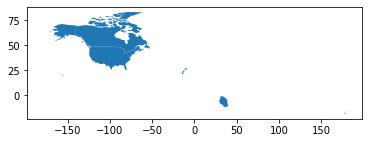

In [11]:
# ထိပ်ဆုံး (၅) ခုအား plot လုပ်ခြင်း
world.head().plot()

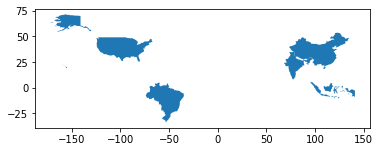

In [12]:
# လူဦးရေအများဆုံးနိုင်ငံ (၅)နိုင်ငံအား plot လုပ်ခြင်း

world.sort_values('pop_est',ascending=False).head(5).plot()

In [13]:
# အပေါ်က သဘောတရားတွေကို သိပြီဆိုရင် ဝင်ငွေတွေတွက်ရအောင်
world['GDP_per_cap']=world.gdp_md_est / world.pop_est #ဒီ formula ကို လူတိုင်းသိတဲ့အတွက် မရှင်းပြတော့ပါဘူး။။
world.head()

# output ထုတ်လိုက်ပါက အပေါ်မှာတွက်ထုတ်ထားတဲ့ column အသစ်တခုကိုတွေ့ရမှာဖြစ်ပါတယ်။ 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDP_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823


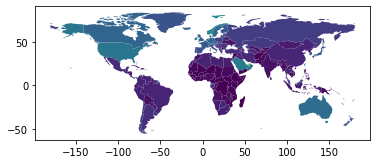

In [14]:
# တွက်ထုတ်ထားသော column ဖြင့် plotting လုပ်ခြင်း
world.plot(column='GDP_per_cap') #column name ရေးပေးရင် ရပါတယ်။ (သို့) world.GDP_per_cap (သို့) world['GDP_per_cap']

In [16]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


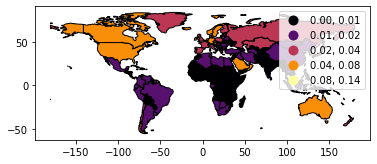

In [23]:
world.plot(column='GDP_per_cap',cmap='inferno',scheme='naturalbreaks', edgecolor='k') 

# ဒီနေရာမှာ cmap က color rand တွေကို ပြောတာဖြစ်ပြီး scheme ကတော့ classification ခွဲတာဖြစ်ပြီး သူ့မှာ quantiles, equalintervals, naturalbreaks ဆိုပြီးရှိပါတယ်။
# edge color ကတော့ အနားသပ်အရောင်ဖြစ်ပါတယ်။ 
# ဒီလောက်ဆိုရင် သဘောပေါက်ပြီ လို့ယူဆပါတယ်။

In [ ]:
# ဒီနေ့တော့ ဒီလောက်ပါပဲ။ (25-6-2022)